<a href="https://colab.research.google.com/github/djhsgfjk/computer_vision/blob/main/Lab_5_6_%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%B8_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%81%D0%BE%D0%B1%D1%8B%D1%85_%D1%82%D0%BE%D1%87%D0%B5%D0%BA_ORB_%D0%9B%D0%BE%D0%BA%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B0_%D0%BF%D0%BE_%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%B2%D1%8B%D0%BC_%D1%82%D0%BE%D1%87%D0%BA%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from pylab import *
import random

# 0. Подготовка изображений

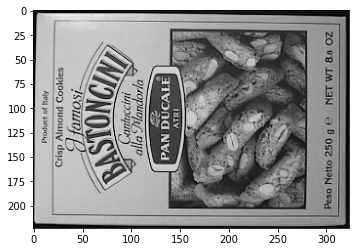

In [ ]:
box=np.array(Image.open('/box.png'), dtype=int)
figure()
imshow(box, cmap='gray', vmin=0, vmax=255)
show()

Масштабируем изображение в 2 и 4 раза

In [ ]:
def scale(I, s):
  w = I.shape[0]
  h = I.shape[1]

  newI = np.zeros((w//s, h//s), dtype=int)

  for i in range(0, w//s):
    for j in range(0, h//s):
      #print(int(np.mean(I[i*s:s*(i+1), j*s:s*(j+1)])))
      newI[i, j] = int(np.mean(I[i*s:s*(i+1), j*s:s*(j+1)]))

  return newI

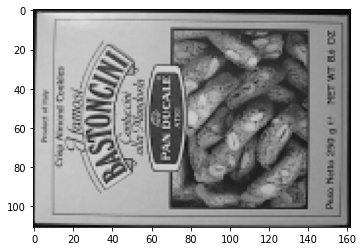

In [ ]:
box2 = scale(box, 2)
figure()
imshow(box2, cmap='gray', vmin=0, vmax=255)
show()

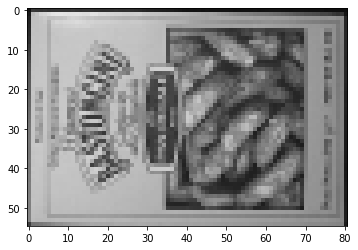

In [ ]:
box4 = scale(box2, 2)
figure()
imshow(box4, cmap='gray', vmin=0, vmax=255)
show()

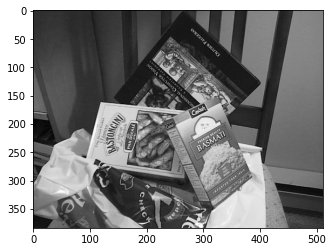

In [ ]:
scene=np.array(Image.open('/box_in_scene.png'), dtype=int)
figure()
imshow(scene, cmap='gray', vmin=0, vmax=255)
show()

# 1. Детектирование особых точек 

Детектирование особых точек на основе алгоритма FAST. Для отбора используется так называемый круг Брезенхема
радиуса 3. 

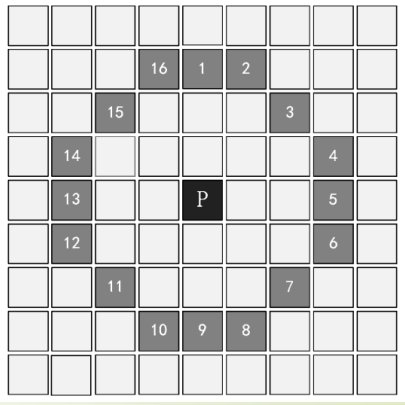

In [ ]:
patch_size=31

In [ ]:
def FAST(image, n, t):
  if n < 6 or n > 16:
    return

  w = image.shape[0]
  h = image.shape[1]

  features = []
  for i in range(patch_size//2, w-patch_size//2):
    for j in range(patch_size//2, h-patch_size//2):
      p = image[i, j]
      B1 = np.concatenate((image[i:i+2, j-3], image[i+2, j-2], image[i+3, j-1:j+2], image[i+2, j+2], image[i:i+2, j+3]), axis=None)
      B2 = np.concatenate((image[i+3, j:j+2], image[i+2, j+2], image[i-1:i+2, j+3], image[i-2, j+2], image[i-3, j:j+2]), axis=None)
      B =  np.concatenate((image[i-1:i+2, j-3], image[i+2, j-2], image[i+3, j-1:j+2], image[i+2, j+2], image[i-1:i+2, j+3], image[i-2, j+2], image[i-3, j-1:j+2], image[i-2, j-2]), axis=None)
      count = 0
      if (all(q > p+t for q in B1) or all(q > p+t for q in B2)):
        for q in np.concatenate((B, B), axis=None):
          if q > p+t:
            count += 1
          else:
            count = 0
          if count >= n:
            features.append((i, j))
            break
      elif (all(q < p-t for q in B1) or all(q < p-t for q in B2)):
        for q in np.concatenate((B, B), axis=None):
          if q < p-t:
            count += 1
          else:
            count = 0
          if count >= n:
            features.append((i, j))
            break
  return features

In [ ]:
F1 = FAST(box, 12, 30)
F12 = FAST(box2, 12, 30)
F14 = FAST(box4, 12, 30)
print(len(F1), F1)
print(len(F12), F12)
print(len(F14), F14)

1189 [(22, 300), (22, 306), (23, 300), (23, 301), (23, 306), (24, 302), (25, 194), (25, 300), (25, 306), (29, 303), (32, 148), (32, 300), (33, 71), (33, 241), (33, 300), (34, 70), (34, 71), (34, 242), (34, 300), (34, 301), (35, 70), (35, 301), (35, 302), (35, 303), (35, 305), (36, 69), (36, 75), (36, 76), (36, 77), (37, 68), (37, 78), (37, 163), (38, 67), (38, 79), (38, 80), (38, 225), (39, 67), (39, 73), (39, 81), (39, 156), (39, 168), (39, 169), (40, 66), (40, 72), (40, 82), (40, 157), (40, 170), (40, 198), (40, 199), (40, 228), (41, 65), (41, 72), (41, 83), (41, 84), (42, 71), (42, 76), (42, 85), (42, 154), (42, 204), (42, 275), (42, 301), (42, 302), (42, 303), (42, 306), (43, 64), (43, 70), (43, 86), (43, 87), (43, 206), (43, 246), (43, 275), (43, 276), (43, 301), (43, 306), (44, 63), (44, 70), (44, 88), (44, 192), (44, 207), (44, 227), (44, 228), (44, 302), (44, 303), (45, 69), (45, 89), (45, 227), (45, 228), (46, 62), (46, 73), (46, 74), (46, 80), (46, 91), (46, 161), (46, 193), 

In [ ]:
F2 = FAST(scene, 12, 30)
print(len(F2), F2)

1089 [(63, 239), (71, 228), (72, 253), (73, 444), (75, 264), (78, 232), (78, 251), (78, 258), (78, 326), (79, 237), (80, 237), (80, 257), (82, 248), (83, 240), (83, 248), (84, 233), (84, 248), (84, 261), (85, 262), (88, 241), (89, 240), (90, 250), (91, 227), (91, 232), (91, 264), (93, 240), (93, 245), (95, 229), (95, 240), (95, 274), (96, 229), (96, 234), (96, 275), (96, 276), (97, 230), (97, 239), (97, 276), (97, 277), (98, 275), (99, 231), (99, 275), (100, 233), (100, 235), (100, 236), (100, 249), (101, 235), (101, 258), (102, 245), (102, 294), (105, 251), (105, 262), (105, 264), (106, 251), (106, 290), (107, 251), (107, 290), (109, 253), (110, 241), (110, 253), (112, 242), (112, 289), (112, 304), (114, 245), (114, 251), (114, 264), (115, 276), (117, 261), (118, 260), (121, 301), (124, 279), (124, 301), (124, 308), (124, 310), (125, 291), (125, 303), (127, 304), (127, 312), (128, 401), (129, 316), (130, 308), (131, 309), (131, 310), (132, 285), (132, 300), (133, 286), (133, 287), (13

Полученные по алгоритму FAST точки фильтруем по критерию угловых точек Харриса. 

In [ ]:
def build_W(sigma2):
  const1 = 2*sigma2
  const2 = 2*np.pi*sigma2

  G = np.zeros((5, 5), dtype=np.float64)

  for i in range(5):
    for j in range(5):
      G[i, j] = np.power(np.e, -((i-3)**2 + (j-3)**2)/const1)/const2

  G /= np.sum(G)
  return G 

In [ ]:
W = build_W(100)
print(W)

[[0.03766047 0.03861385 0.03919742 0.0393939  0.03919742]
 [0.03861385 0.03959136 0.04018971 0.04039116 0.04018971]
 [0.03919742 0.04018971 0.0407971  0.04100159 0.0407971 ]
 [0.0393939  0.04039116 0.04100159 0.04120711 0.04100159]
 [0.03919742 0.04018971 0.0407971  0.04100159 0.0407971 ]]


In [ ]:
def get_gradient(image):
  width = image.shape[0]
  height = image.shape[1]

  imageCopy = np.zeros((width+1, height+1), dtype=int)

  for i in range(width):
    for j in range(height):
      imageCopy[i+1, j+1] = image[i, j]

  gradient = np.zeros((width+1, height+1, 2), dtype=float)

  for i in range(1, width):
    for j in range(1, height):
      gradient[i, j, 0] = (imageCopy[i+1, j]-imageCopy[i-1, j] + imageCopy[i+1, j-1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i-1, j+1])/6
      gradient[i, j, 1] = (imageCopy[i, j+1]-imageCopy[i, j-1] + imageCopy[i-1, j+1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i+1, j-1])/6

  return gradient[1:width+1, 1:height+1, :]

In [ ]:
grad1 = get_gradient(box)
grad12 = get_gradient(box2)
grad14 = get_gradient(box4)

In [ ]:
grad2 = get_gradient(scene)

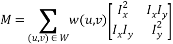

In [ ]:
def get_M(I, grad, u, v):
  w = I.shape[0]
  h = I.shape[1]

  Icopy = np.zeros((w+4, h+4), dtype=int)
  Icopy[2:w+2, 2:h+2] = I

  M = np.zeros((2, 2), dtype=float)
  for i in range(u-2, u+3):
    for j in range(v-2, v+3):
      Ix = grad[i, j, 0]
      Iy = grad[i, j, 1]
      A = np.array([[Ix**2, Ix*Iy], [Ix*Iy, Iy**2]], dtype=float)
      A.shape = (2, 2)
      new = np.sum(W * Icopy[i-2+2:i+3+2, j-2+2:j+3+2]) * A
      M = np.add(M, new)
  return M

In [ ]:
def get_M_for_all_points(image, grad, F):
  M = []
  for p in F:
    x, y = p
    m = get_M(image, grad, x, y)
    M.append(m)
  return M

In [ ]:
M1 = get_M_for_all_points(box, grad1, F1)
M12 = get_M_for_all_points(box, grad12, F12)
M14 = get_M_for_all_points(box, grad14, F14)

In [ ]:
M2 = get_M_for_all_points(scene, grad2, F2)

На основе значения критерия R = det(M) - k*(tr(M))^2 принять решение о фильтрации ключевой точки. Параметр k выбрать из интервала [0.04, 0.06]. 

In [ ]:
def get_R(m, k):
  r = np.linalg.det(m) - k * np.trace(m)**2
  return r

In [ ]:
def get_R_for_all_points(M, k):
  R = []
  for m in M:
    r = get_R(m, k)
    R.append(r)
  return R

In [ ]:
k = 0.04
R1 = get_R_for_all_points(M1, k)
R12 = get_R_for_all_points(M12, k)
R14 = get_R_for_all_points(M14, k)
print(R1)
print(R12)
print(R14)

[2809546213375.5786, 865100989188.5393, 5020724924224.743, 6339813070858.173, 1622136398016.9163, 4242066132445.5845, 97311589916.62741, 4823405572216.782, 3185372646682.7856, 4021919089721.674, 19289719362.63428, 5219566316563.054, 673610708216.3608, 372122204552.4504, 4342076909073.5034, 847858080399.6704, 770186671590.094, 167293050275.6402, 4405384977277.588, 7862294486791.405, 230100894013.00604, 4346099943121.7114, 4158629394143.133, 3532191028181.767, 2100115408127.8276, -121982070588.11823, 4705630706369.55, 5105803240473.722, 4419164596261.791, -128689484128.97536, 1346147014324.1865, 139203229043.78378, -109514203735.52744, 15422936519.641113, -274372000094.73975, 12722750579.54966, -91726451208.87341, 57640158437.05591, -36438210016.0, 416207712433.7741, 246937451459.3028, 338741782876.1566, -101480805675.7353, -216407081210.61957, 229110800893.29468, 257976117721.0129, 201738488800.13898, 495495777936.75946, 599176448660.2405, 38117509634.137474, -89583143936.77292, -266719

In [ ]:
R2 = get_R_for_all_points(M2, k)
print(R2)

[769700141693.8677, 381152792419.8086, 129239217384.38342, -183894211897.53946, 17617556024.07102, 1168374029837.5657, 6619285340851.206, 354683863902.5206, 3636041718012.9414, 5198560352795.254, 5143350532183.908, 864434367828.4609, 1277611100894.9656, 983249615460.4451, 999349751614.4905, 1034732986192.645, 461394239117.7963, 2698388831037.001, 634639469045.8522, 5209846662895.355, 4972719407728.774, 1308254671944.6575, 106760290321.0951, 660905188471.8658, 1182906617660.8665, 990825767709.0717, 1933183298014.0686, 3850005603309.621, 921264015767.7484, 807876791097.9478, 3457389046382.628, 1074614305581.87, 3578263687396.7495, 4952239633896.936, 2807822760521.915, 2110745609952.6833, 6045259811740.257, 5611471242160.069, 3597017037693.442, 2405226475977.1587, 1735896123816.2341, 872119663337.6688, 2300126754805.634, 2959460281396.5835, 1055161579274.6938, 2109940313380.4697, 1829222089414.9712, 1719499568667.559, 25293632566.877213, 559384597358.5001, 5136651784972.316, 3679353951267

Отфильтровать точки по убыванию значения критерия Харриса и выбрать первые N точек.

In [ ]:
def Harris_filtering(F, R, N):
  point_R = dict()
  for i in range(len(F)):
    point_R[F[i]] = R[i]
    
  d = dict(sorted(point_R.items(), key=lambda item: item[1], reverse=True)[0:N])
  m = N
  for key in reversed(list(d.keys())):
    if d[key] >= 0:
      break 
    m -= 1
  points = list(d.keys())[0:m]
  return points

In [ ]:
P1 = Harris_filtering(F1, R1, 500)
P12 = Harris_filtering(F12, R12, len(F12))
P14 = Harris_filtering(F14, R14, len(F14))
print(len(P1), P1)
print(len(F12), len(P12), P12)
print(len(F14), len(P14), P14)

500 [(93, 56), (53, 70), (93, 55), (92, 56), (101, 54), (117, 135), (53, 69), (83, 108), (117, 134), (80, 74), (81, 74), (143, 53), (93, 25), (92, 55), (92, 24), (106, 41), (132, 34), (111, 41), (103, 77), (117, 136), (158, 65), (111, 42), (95, 78), (52, 70), (82, 108), (53, 71), (96, 78), (164, 95), (70, 86), (102, 107), (83, 138), (83, 109), (52, 69), (80, 73), (144, 52), (81, 73), (104, 77), (69, 62), (96, 79), (95, 79), (135, 56), (158, 64), (72, 86), (135, 61), (142, 77), (70, 87), (127, 49), (134, 61), (152, 87), (116, 136), (108, 27), (61, 105), (118, 94), (90, 94), (131, 35), (146, 85), (127, 79), (101, 107), (158, 23), (118, 134), (142, 76), (143, 77), (119, 94), (131, 34), (90, 24), (176, 74), (145, 84), (118, 136), (89, 136), (117, 45), (153, 87), (64, 91), (71, 87), (177, 74), (97, 135), (130, 110), (93, 27), (103, 78), (116, 45), (127, 50), (80, 83), (125, 54), (131, 111), (142, 53), (91, 24), (124, 55), (159, 64), (111, 40), (100, 107), (82, 107), (60, 105), (143, 76), (4

In [ ]:
P2 = Harris_filtering(F2, R2, 500)
print(len(P2), P2)

500 [(231, 309), (230, 310), (241, 293), (242, 293), (244, 294), (240, 293), (259, 92), (270, 108), (241, 292), (240, 292), (259, 93), (176, 307), (270, 107), (231, 307), (368, 288), (181, 284), (181, 283), (232, 315), (229, 310), (325, 192), (245, 294), (231, 308), (325, 193), (271, 107), (363, 290), (258, 92), (324, 192), (177, 305), (252, 169), (228, 310), (194, 182), (271, 109), (202, 137), (258, 93), (242, 132), (193, 144), (241, 132), (201, 138), (192, 144), (324, 193), (179, 283), (225, 327), (236, 308), (360, 195), (230, 140), (242, 131), (193, 143), (205, 177), (271, 106), (235, 133), (168, 334), (195, 183), (200, 183), (207, 146), (197, 141), (248, 134), (212, 134), (266, 118), (193, 145), (360, 196), (192, 143), (167, 334), (181, 285), (177, 294), (359, 196), (266, 119), (200, 138), (190, 281), (252, 134), (168, 333), (187, 150), (196, 141), (251, 169), (224, 131), (238, 301), (186, 150), (212, 133), (197, 323), (243, 131), (177, 186), (276, 133), (197, 140), (276, 134), (21

In [ ]:
def draw_featurs(image, points):
  w = image.shape[0]
  h = image.shape[1]
  imageWithFeatures = np.zeros((w, h, 3), dtype=int)
  for i in range(w):
      for j in range(h):
          imageWithFeatures[i, j, :] = image[i, j]

  color = [0, 0, 255]
  for i, j in points:
    imageWithFeatures[i-1:i+2, j-3] = color
    imageWithFeatures[i+2, j-2] = color
    imageWithFeatures[i+3, j-1:j+2] = color
    imageWithFeatures[i+2, j+2] = color
    imageWithFeatures[i-1:i+2, j+3] = color
    imageWithFeatures[i-2, j+2] = color
    imageWithFeatures[i-3, j-1:j+2] = color
    imageWithFeatures[i-2, j-2] = color
  return imageWithFeatures

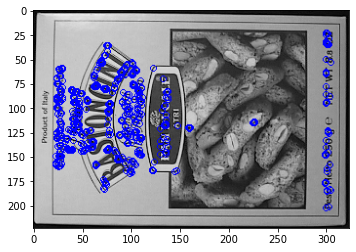

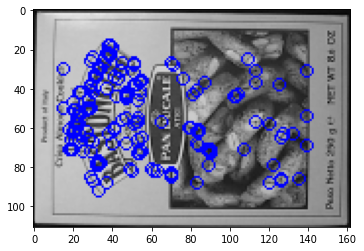

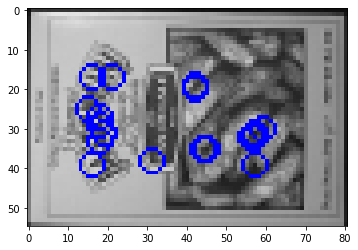

In [ ]:
boxWithFeatures = draw_featurs(box, P1)

figure()
imshow(boxWithFeatures, vmin=0, vmax=255)
show()

boxWithFeatures2 = draw_featurs(box2, P12)
boxWithFeatures4 = draw_featurs(box4, P14)

imshow(boxWithFeatures2, vmin=0, vmax=255)
show()
imshow(boxWithFeatures4, vmin=0, vmax=255)
show()

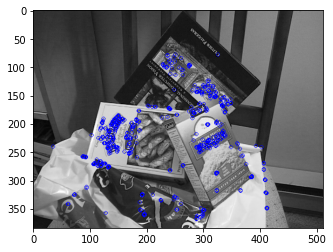

In [ ]:
sceneWithFeatures = draw_featurs(scene, P2)

figure()
imshow(sceneWithFeatures, vmin=0, vmax=255)
show()

# 2. Описание ключевых точек (построение дескриптора)

Для каждой оставшейся после фильтрации точки вычислить ориентацию на основе моментов изображения m01,m10:

angle = atan2(m01; m10).


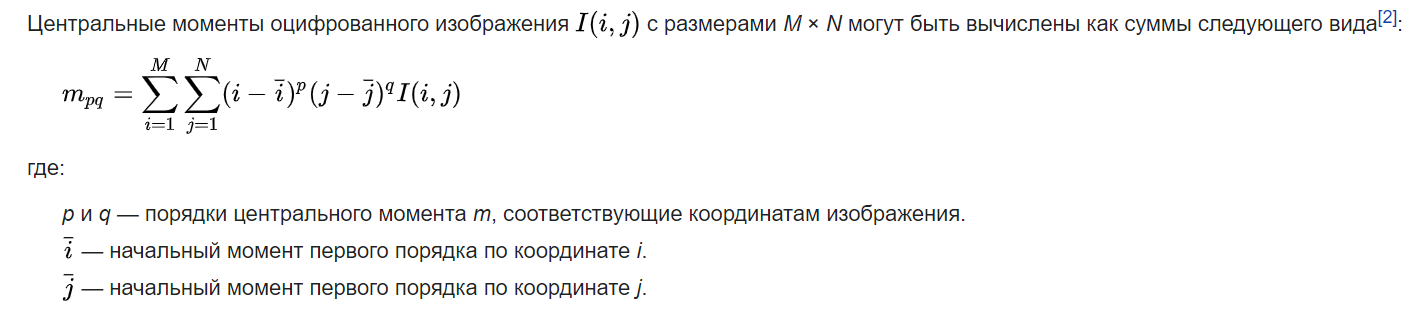

In [ ]:
def get_moment(I, p, q, x, y, r):
  
  w = I.shape[0]
  h = I.shape[1]

  ci = w//2
  cj = h//2

  m = 0
  for i in range(max(0, x-r), min(w, x+r+1)):
      for j in range(max(0, y-r), min(h, y+r+1)):
        m += (i-ci)**p * (j-cj)**q * I[i, j]
  return m

In [ ]:
import math

def get_angles(I, points, r):

  angles = []
  for x, y in points:
    m01 = get_moment(I, 0, 1, x, y, r)
    m10 = get_moment(I, 1, 0, x, y, r)
    a = math.atan2(m01, m10) % (2*np.pi)
    angles.append(a)

  return angles

In [ ]:
  patch_size = 31
  r = patch_size

In [ ]:
A1 = get_angles(box, P1, r)
A12 = get_angles(box2, P12, r)
A14 = get_angles(box4, P14, r)
print(A1)
print(A12)
print(A14)

[4.541156943477764, 4.143967815960006, 4.542777322109971, 4.532657085223168, 4.616549176535526, 4.899626388501431, 4.149289213702245, 4.230333092616846, 4.893064073373852, 4.368794357943157, 4.3791703991031525, 5.0007404829525655, 4.57421423674087, 4.534277860604394, 4.567473961098502, 4.667677786816716, 4.879366015723805, 4.710897583543868, 4.612669287022355, 4.905947429837948, 5.169584755500276, 4.711016099010644, 4.516291007273184, 4.1364427285549255, 4.214791888427114, 4.138771836878985, 4.52659500278192, 5.404189873981798, 4.2013587544387025, 4.555173395071631, 3.8395763009002994, 4.224559847469811, 4.141785698239916, 4.372376752334607, 5.007096047703758, 4.3825967389614515, 4.623198531487191, 4.313491720618928, 4.525108917541161, 4.51468769053248, 4.93741713347832, 5.165204901220133, 4.221234088149961, 4.944645385804925, 5.0673287651678685, 4.195333435327672, 4.854883555037967, 4.9362233675557174, 5.228451531222107, 4.87140070239109, 4.688229529530273, 3.9690930309150554, 4.81952

In [ ]:
A2 = get_angles(scene, P2, r)
print(A2)

[0.9456657267529774, 0.9656776154284664, 0.6661474901427992, 0.6560898122905885, 0.648601132939141, 0.676106769653758, 5.0953981050934996, 5.176584740054475, 0.6526197958869676, 0.6626698781892147, 5.097088822098378, 1.8259955975432185, 5.174801327640967, 0.9320737417530057, 0.2020645016185753, 1.75217327208191, 1.7566054646193527, 0.9713487585186774, 0.9791367303091509, 5.863229040722776, 0.6396351010800249, 0.9389681966191289, 5.86947582652993, 5.179503786421853, 0.21754736090325497, 5.090506633474979, 5.85990879708736, 1.8100551158239515, 5.306504585634995, 0.9927719971880794, 4.727365383225968, 5.183113212072355, 4.791420764303422, 5.092212836372704, 5.096903488265305, 4.7193380412312, 5.090413307698794, 4.782457405663327, 4.713761073625713, 5.866349137173665, 1.8201717591314899, 1.1140107789342644, 0.8759315612302144, 5.934890184462138, 5.027485208869139, 5.0947705300327515, 4.7204670169915985, 4.844028397307405, 5.177733684075443, 5.052531388756633, 1.871958855712525, 4.735037559

Перед построением дескриптора изображение необходимо сгладить с помощью фильтра Гаусса

In [ ]:
def build_G(sigma2_e):
  const1 = 2*sigma2_e
  const2 = 2*np.pi*sigma2_e

  G = np.zeros(9, dtype=np.float64)
  G.shape = (3, 3)

  for i in range(3):
    for j in range(3):
      G[i, j] = np.power(np.e, -((i-3//2)**2 + (j-3//2)**2)/const1)/const2

  G /= np.sum(G)
  return G

G = build_G(100)
print(G)

def Gaussian_filtering(image_e):
  width_e = image_e.shape[0]
  height_e = image_e.shape[1]

  gaussImage = np.zeros(width_e*height_e, dtype=int)
  gaussImage.shape = (width_e, height_e)

  image_eCopy = np.zeros((width_e+1)*(height_e+1), dtype=int)
  image_eCopy.shape = ((width_e+1),(height_e+1))


  for i in range(width_e):
      for j in range(height_e):
        image_eCopy[i+1, j+1] = image_e[i, j]

  for i in range(1, width_e-1):
      for j in range(1, height_e-1):
        gaussImage[i, j] = np.sum(G * image_eCopy[i-1:i+2, j-1:j+2])

  gaussImage = clip(gaussImage, 0, 255)     
  return gaussImage 

[[0.11074074 0.11129583 0.11074074]
 [0.11129583 0.1118537  0.11129583]
 [0.11074074 0.11129583 0.11074074]]


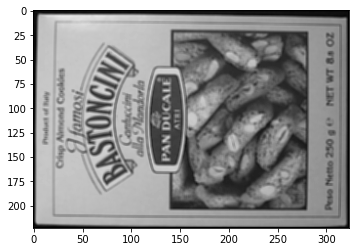

In [ ]:
gaussBox = Gaussian_filtering(box)
figure()
imshow(gaussBox, cmap='gray', vmin=0, vmax=255)

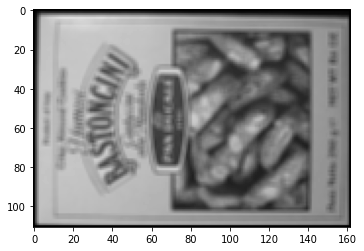

In [ ]:
gaussBox2 = Gaussian_filtering(box2)
figure()
imshow(gaussBox2, cmap='gray', vmin=0, vmax=255)

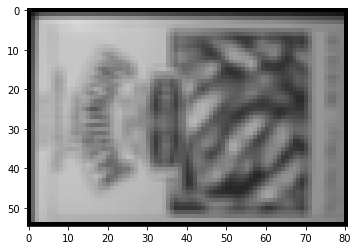

In [ ]:
gaussBox4 = Gaussian_filtering(box4)
figure()
imshow(gaussBox4, cmap='gray', vmin=0, vmax=255)

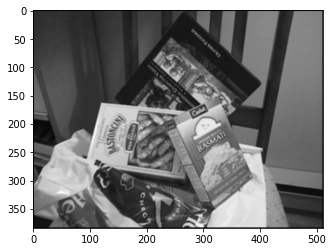

In [ ]:
gaussScene = Gaussian_filtering(scene)
figure()
imshow(gaussScene, cmap='gray', vmin=0, vmax=255)

BRIEF представляет из себя бинарный вектор, каждый элемент которого получается из сравнения
интенсивностей пикселей из области вокруг особой точки.

In [ ]:
theta = [2*k*np.pi/30 for k in range(30)]
print(len(theta), theta)

30 [0.0, 0.20943951023931953, 0.41887902047863906, 0.6283185307179586, 0.8377580409572781, 1.0471975511965976, 1.2566370614359172, 1.4660765716752369, 1.6755160819145563, 1.8849555921538759, 2.0943951023931953, 2.3038346126325147, 2.5132741228718345, 2.7227136331111543, 2.9321531433504737, 3.1415926535897927, 3.3510321638291125, 3.5604716740684323, 3.7699111843077517, 3.979350694547071, 4.1887902047863905, 4.39822971502571, 4.607669225265029, 4.817108735504349, 5.026548245743669, 5.235987755982989, 5.445427266222309, 5.654866776461628, 5.8643062867009474, 6.073745796940267]


In [ ]:
Rt = []
for t in theta:
  rt = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
  Rt.append(rt)

In [ ]:
n = 256 #длина дескриптора
S = (np.pi/5) * np.random.randn(n, 2, 2)

In [ ]:
S /= np.max(S)
S *= (patch_size//2 - 2)
print(S)

[[[-2.60257396  0.26275345]
  [ 2.80749405  2.95144051]]

 [[ 1.7380909  -5.08470024]
  [-2.59719601 -8.06194312]]

 [[-0.25666809  1.01226019]
  [-9.03871044  0.73033593]]

 ...

 [[-0.73761763 -0.7866646 ]
  [-1.27250527 -3.98943352]]

 [[-2.93749132 -5.73891606]
  [-6.93145582 -3.56520329]]

 [[ 3.93550568  0.94990169]
  [-6.69949737 -1.61088656]]]


In [ ]:
St = []
for rt in Rt:
  st = []
  for i in range(S.shape[0]):
    st.append(list(np.array([rt.dot(S[i, 0]), rt.dot(S[i, 1])], dtype=int)))
  St.append(st)

print(St)

[[[array([-2,  0]), array([2, 2])], [array([ 1, -5]), array([-2, -8])], [array([0, 1]), array([-9,  0])], [array([ 0, -6]), array([6, 0])], [array([-6,  1]), array([11,  4])], [array([0, 1]), array([2, 2])], [array([2, 0]), array([-2, -6])], [array([-4,  2]), array([4, 0])], [array([2, 1]), array([3, 0])], [array([ 2, -2]), array([4, 0])], [array([-1, -1]), array([-2,  0])], [array([5, 0]), array([7, 7])], [array([-5, -2]), array([0, 1])], [array([ 1, -1]), array([1, 0])], [array([-2, -4]), array([-2,  1])], [array([-2, -2]), array([-6, -4])], [array([0, 2]), array([0, 7])], [array([-3, -1]), array([ 0, -7])], [array([-4, -6]), array([ 0, -6])], [array([2, 5]), array([2, 4])], [array([-1,  1]), array([5, 0])], [array([3, 1]), array([-5, -1])], [array([0, 1]), array([0, 0])], [array([0, 7]), array([2, 7])], [array([-2, -3]), array([0, 0])], [array([-3,  0]), array([1, 0])], [array([0, 0]), array([0, 2])], [array([-4,  1]), array([-3, -1])], [array([-2, -4]), array([-1,  2])], [array([-1

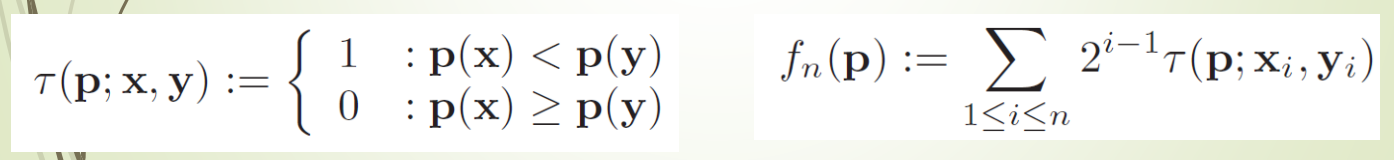

In [ ]:
def get_descriptor(gaussImage, points, angles, patch_size):
  w = gaussImage.shape[0]
  h = gaussImage.shape[1]

  def tau(p, x, y):
    if p[x[0], x[1]] < p[y[0], y[1]]:
      return 1
    return 0

  descriptor = []
  for j in range(len(points)):
    c = points[j]
    #print("center: ", c[0], c[1])

    t = len(theta)-1
    for i in range(len(theta)):
      if angles[j] < theta[i]:
        t = i-1
        break
    s = [[St[t][i][0] + c, St[t][i][1] + c] for i in range(n)]

    f = []

    for i in range(n-1, -1, -1):
      f.append(tau(gaussImage, s[i][0], s[i][1]))
    descriptor.append(np.array(f))
  
  return descriptor

In [ ]:
D1 = get_descriptor(gaussBox, P1, A1, patch_size)
# for key in D1.keys():
#   print(key, ":", D1[key])

In [ ]:
D12 = get_descriptor(gaussBox2, P12, A12, patch_size)
D14 = get_descriptor(gaussBox4, P14, A14, patch_size)

In [ ]:
D2 = get_descriptor(gaussScene, P2, A2, patch_size)

# 3. Локализация объекта по ключевым точкам

**Для box:**

P1 - ключевые точки;
D1 - десткрипторы;
A1 - углы;

**Для scene:**

P2 - ключевые точки;
D2 - десткрипторы;
A2 - углы;


Для сопоставления дескрипторов используется расстояние Хэмминга

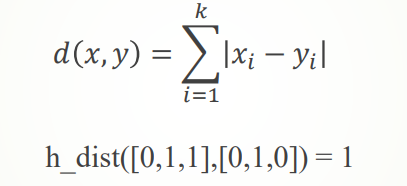

In [ ]:
def compare_descriptors(D1, D2):
  w = len(D1)
  h = len(D2)
  h_dist = np.zeros((w, h), dtype=int)

  for i in range(w):
    for j in range(h):
      v1 = D1[i]
      v2 = D2[j]
      d = sum(np.absolute(v1-v2))
      h_dist[i, j] = d

  return h_dist

In [ ]:
h_dist_1_2 = compare_descriptors(D1, D2)
print(h_dist_1_2)

[[145 133 132 ...  64 120 107]
 [155 129 138 ...  84 106 105]
 [156 146 133 ...  89 129 110]
 ...
 [ 95  91 134 ... 108 112 131]
 [134 144 147 ... 137 117 120]
 [125 111 124 ... 122  84 119]]


In [ ]:
h_dist_12_2 = compare_descriptors(D12, D2)
print(h_dist_12_2)

[[139 127 148 ... 144  76 119]
 [118 128 131 ...  99 117 132]
 [142 120 151 ... 143  65 112]
 ...
 [146 152 137 ... 105 137 118]
 [145 149 132 ... 104 126 121]
 [123 121 128 ...  88 116 135]]


In [ ]:
h_dist_14_2 = compare_descriptors(D14, D2)
print(h_dist_14_2)

[[136 124 147 ... 121  77  98]
 [127 109 124 ...  88 112 119]
 [114  94 127 ... 149  95 112]
 ...
 [119 131 136 ... 142 114 155]
 [130 128 133 ... 135 113 126]
 [131 129 106 ... 128 136 137]]


Использовать тест Lowe и Cross Check для определения лучших матчей.

In [ ]:
def Lowe_test(points1, points2, h_dist):
  R_Lowe = 0.8
  w = h_dist.shape[0]
  h = h_dist.shape[1]

  Lowe_dist1 = []
  Lowe_dist2 = []

  for i in range(w):
    sorted_dist = sorted(h_dist[i])
    for t in range(len(sorted_dist)-1):
      dist1, dist2 = sorted_dist[t:t+2]
      R = dist1/dist2 
      if R < R_Lowe:
        j = list(h_dist[i]).index(dist1)
        Lowe_dist1.append([points1[i], points2[j]])
        break

  for i in range(h):
    sorted_dist = sorted(h_dist[:, i])
    # j = list(h_dist[:, i]).index(sorted_dist[0])
    # Lowe_dist2.append([points1[j], points2[i]])
    for t in range(len(sorted_dist)-1):
      dist1, dist2 = sorted_dist[t:t+2]
      R = dist1/dist2 
      if R < R_Lowe:
        j = list(h_dist[:, i]).index(dist1)
        Lowe_dist2.append([points1[j], points2[i]])
        break

  return [Lowe_dist1, Lowe_dist2]

In [ ]:
L_dist_1_2 = Lowe_test(P1, P2, h_dist_1_2)
print(len(L_dist_1_2[0]), len(L_dist_1_2[1]))
print(L_dist_1_2)

7 4
[[[(131, 34), (211, 188)], [(135, 62), (139, 290)], [(79, 111), (268, 117)], [(149, 29), (220, 103)], [(86, 98), (270, 407)], [(60, 30), (241, 349)], [(140, 138), (331, 254)]], [[(159, 28), (258, 93)], [(130, 133), (240, 302)], [(24, 302), (170, 216)], [(60, 30), (241, 349)]]]


In [ ]:
L_dist_12_2 = Lowe_test(P12, P2, h_dist_12_2)
print(len(L_dist_12_2[0]), len(L_dist_12_2[1]))
print(L_dist_12_2)

9 44
[[[(79, 33), (242, 133)], [(78, 34), (242, 132)], [(88, 37), (252, 134)], [(77, 33), (241, 132)], [(27, 36), (165, 293)], [(81, 49), (247, 149)], [(62, 27), (224, 131)], [(62, 21), (224, 124)], [(30, 15), (270, 407)]], [[(28, 71), (363, 290)], [(79, 32), (242, 131)], [(88, 37), (252, 134)], [(62, 27), (224, 131)], [(79, 33), (243, 131)], [(30, 15), (276, 133)], [(42, 24), (201, 139)], [(66, 28), (236, 131)], [(54, 139), (177, 187)], [(62, 27), (224, 130)], [(63, 38), (226, 141)], [(79, 33), (242, 133)], [(63, 38), (226, 140)], [(63, 38), (226, 142)], [(60, 79), (361, 196)], [(83, 70), (251, 171)], [(38, 125), (164, 349)], [(79, 122), (237, 315)], [(81, 49), (172, 239)], [(82, 50), (170, 216)], [(82, 50), (170, 215)], [(25, 109), (132, 300)], [(30, 15), (241, 349)], [(32, 51), (196, 324)], [(69, 139), (282, 242)], [(69, 139), (236, 361)], [(79, 122), (240, 310)], [(60, 80), (178, 275)], [(88, 37), (251, 136)], [(69, 139), (244, 365)], [(62, 83), (299, 409)], [(81, 49), (246, 148)],

In [ ]:
L_dist_14_2 = Lowe_test(P14, P2, h_dist_14_2)
print(len(L_dist_14_2[0]), len(L_dist_14_2[1]))
print(L_dist_14_2)

1 71
[[[(38, 31), (218, 288)]], [[(25, 15), (270, 108)], [(38, 31), (270, 107)], [(17, 16), (271, 107)], [(25, 15), (194, 182)], [(17, 16), (271, 109)], [(17, 16), (202, 137)], [(25, 15), (193, 144)], [(25, 15), (201, 138)], [(39, 16), (192, 144)], [(17, 16), (193, 143)], [(17, 16), (271, 106)], [(39, 16), (195, 183)], [(17, 16), (193, 145)], [(17, 16), (192, 143)], [(25, 15), (200, 138)], [(25, 15), (187, 150)], [(17, 16), (196, 141)], [(25, 15), (197, 140)], [(25, 15), (187, 151)], [(39, 16), (193, 182)], [(17, 16), (177, 187)], [(25, 15), (196, 140)], [(38, 31), (269, 108)], [(17, 16), (274, 114)], [(25, 15), (190, 147)], [(25, 15), (164, 294)], [(17, 16), (199, 173)], [(38, 31), (165, 301)], [(25, 15), (189, 146)], [(38, 31), (218, 288)], [(17, 16), (275, 132)], [(17, 16), (238, 322)], [(17, 16), (213, 135)], [(25, 15), (241, 146)], [(17, 16), (359, 299)], [(25, 15), (335, 226)], [(25, 15), (239, 322)], [(17, 16), (192, 182)], [(38, 31), (244, 365)], [(38, 31), (325, 211)], [(32, 5

**Cross check**

Остаются только те точки, которые являются друг для друга самыми близкими по расстоянию между
дескрипторами.

In [ ]:
def cross_check(L_dist):
  points1 = []
  points2 = []
  for i in range(len(L_dist[0])):
    p1, p2 = L_dist[0][i]
    for j in range(len(L_dist[1])):
      p12, p22 = L_dist[1][j]
      if p1 == p12 and p2 == p22:
        points1.append(p1)
        points2.append(p2)
  return [points1, points2]

In [ ]:
cc_dist_1_2 = cross_check(L_dist_1_2)
print(len(cc_dist_1_2[0]), cc_dist_1_2)

1 [[(60, 30)], [(241, 349)]]


In [ ]:
cc_dist = cross_check(L_dist_12_2)
print(len(cc_dist[0]), cc_dist)

5 [[(79, 33), (88, 37), (81, 49), (62, 27), (30, 15)], [(242, 133), (252, 134), (247, 149), (224, 131), (270, 407)]]


In [ ]:
cc_dist_14_2 = cross_check(L_dist_14_2)
print(len(cc_dist_14_2[0]), cc_dist_14_2)

1 [[(38, 31)], [(218, 288)]]


Отобразим результат!

In [ ]:
def bresenham(x0, y0, x1, y1, n):
    steps_num = int(np.max([np.abs(x0 - x1), np.abs(y0 - y1)]))
    sp = np.linspace(0, 1, steps_num + 1)

    x_coords = np.int32(np.round(x0 * sp + x1 * (1 - sp)))
    y_coords = np.int32(np.round(y0 * sp + y1 * (1 - sp)))

    x_ind = (x_coords > 0) & (x_coords < n)
    y_ind = (y_coords > 0) & (y_coords < n)
    ind = x_ind & y_ind

    x_coords = x_coords[ind]
    y_coords = y_coords[ind]
    res = [list(a) for a in zip(x_coords, y_coords)]
    return (res)

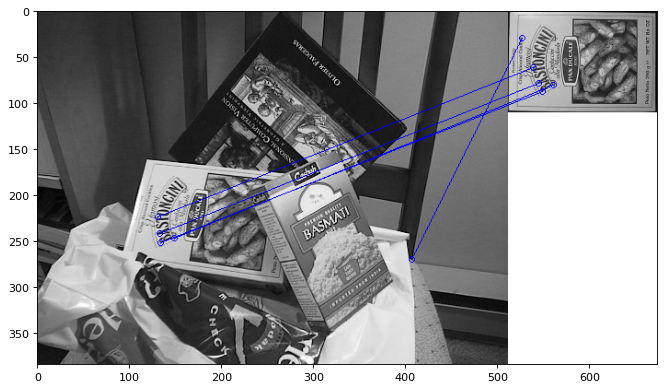

In [ ]:
points1, points2 = cc_dist

I1 = draw_featurs(box2, points1)
I2 = draw_featurs(scene, points2)

color = [0, 0, 255]

h = I1.shape[1] + I2.shape[1]
w = I2.shape[0]

h2 = I2.shape[1]

result = np.ones((w, h, 3), dtype=int) * 255
result[0:I2.shape[0], 0:I2.shape[1]] = I2
result[0:I1.shape[0], I2.shape[1]:] = I1

# newpoints1 = []
for i in range(len(points1)):
  x, y = points1[i]
  y += h2
  x2, y2 = points2[i]
  line = bresenham(x, y, x2, y2, h)
  for u, v, in line:
    result[u, v] = color



# print(newpoints1)
# print(points2)


figure(figsize=(10, 8), dpi=80)
imshow(result, vmin=0, vmax=255)


Оценить матрицу **Аффинного** преобразования для рассматриваемых изображений методом **RANSAC**

In [ ]:
def get_Affine_transformation_parameters(XY, UV):
  x1, y1 = XY[0]
  x2, y2 = XY[1]
  x3, y3 = XY[2]

  u1, v1 = UV[0]
  u2, v2 = UV[1]
  u3, v3 = UV[2]

  m1 = ((u1-u3)*(y1-y2) - (u1-u2)*(y1-y3)) / ((x1-x3)*(y1-y2) - (x1-x2)*(y1-y3))
  m2 = ((u1-u2) - m1*(x1-x2)) / (y1-y2)
  tx = u1 - m1*x1 - m2*y1

  m3 = ((v1-v3)*(y1-y2) - (v1-v2)*(y1-y3)) / ((x1-x3)*(y1-y2) - (x1-x2)*(y1-y3))
  m4 = ((v1-v2) - m3*(x1-x2)) / (y1-y2)
  ty = v1 - m3*x1 - m4*y1

  M = np.array([[m1, m2], [m3, m4]])
  T = np.array([tx, ty])
  T.shape = (2, 1)

  return M, T 

In [ ]:
def Affine_transformation(points, M, T):
  newPoints = []
  for i in range(len(points)):
    p = np.array(points[i])
    p.shape=(2, 1)
    q = np.array(M.dot(p) + T, dtype=int)
    newPoints.append(q)

  return newPoints

In [ ]:
def Least_squares(points):
  if len(points) < 3:
    print(":(")
    return None, None

  A = []
  B = []
  for XY, UV in points:
    x, y = XY
    u, v = UV
    A.append([x, y, 0, 0, 1, 0])
    A.append([0, 0, x, y, 0, 1])
    B.append(u)
    B.append(v)
  n = len(B)
  A = np.array(A, dtype=float64)
  B = np.array(B, dtype=float64)
  B.shape = (n, 1)

  res = np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(B)
  #res = np.linalg.inv(A).dot(B)
  #print(res)
  M = np.array(res[0:4])
  M.shape = (2, 2)
  T = np.array(res[4:6])
  T.shape = (2, 1)
  return M, T

In [ ]:
def RANSAC(points1, points2, N, d):
  m = 3
  if len(points1) < m:
    return None, None

  indexes = [i for i in range(len(points1))]
  max_inliers = -1 
  max_points = len(points1)
  best_points = []
  best_M = None
  best_T = None
  for i in range(N):
    print(i)
    inliers = 0

    random_ind = sorted(indexes, key=lambda indexes: random.random())[0:m]
    points_to_check1 = [points1[j] for j in random_ind]
    points_to_check2 = [points2[j] for j in random_ind]
    M, T = get_Affine_transformation_parameters(points_to_check1, points_to_check2)
    transformated_points = Affine_transformation(points1, M, T)

    points = []
    for j in range(len(points2)):
      x, y = transformated_points[j]
      u, v = points2[j]
      if abs(x-u) < d and abs(y-v) < d:
        x0, y0 = points1[j]
        inliers += 1
        points.append([[x0, y0], [u, v]])

    if inliers == max_points:
      best_points = points
      best_M = M
      best_T = T
      break
    
    if inliers > max_inliers:
      max_inliers = inliers  
      best_points = points
      best_M = M
      best_T = T

  #print(best_points[0:3])      
  best_M, best_T = Least_squares(best_points)
  return best_M, best_T

In [ ]:
M, T = RANSAC(cc_dist[0], cc_dist[1], 5, 2)

0
1
2
3
4


In [ ]:
print(M)
print(T)

[[ 1.0104712   0.17277487]
 [-0.29842932  1.07591623]]
[[156.68586387]
 [120.45287958]]


Отобразим результат!

In [ ]:
def show_box_on_scene(box, scene, M, T):
  w = box.shape[0]
  h = box.shape[1]

  newScene = np.zeros((scene.shape[0], scene.shape[1], 3), dtype=int)
  for i in range(scene.shape[0]):
    for j in range(scene.shape[1]):
      newScene[i, j] = [scene[i, j]] * 3
  color = [0, 0, 255]

  points = []
  for i in range(w):
    for j in range(h):
      points.append([i, j])
  poligon = np.array(Affine_transformation(points, M, T), dtype=int)

  for p in poligon:
    x, y = p
    newScene[x, y] = color

  return newScene

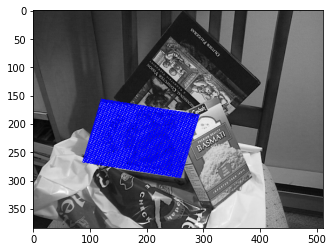

In [ ]:
newScene = show_box_on_scene(box2, scene, M, T)

figure()
imshow(newScene, vmin=0, vmax=255)